In [1]:
!pip install ../dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix
from rekomenda.als import ALSMetrics, BiasOnlyALS, LatentFactorALS
from rekomenda.utils import load_data

In [12]:
train, test  = load_data(filepath='../ml-latest-small/ratings.csv', split_ratio=0.8)

In [13]:
train_csr, test_csr = CSRMatrix.from_coo(train), CSRMatrix.from_coo(test)

In [14]:
train_csc, test_csc = CSCMatrix.from_coo(train), CSCMatrix.from_coo(test)

In [20]:
train_als = BiasOnlyALS(lambda_reg=0.1, gamma_reg=0.01)

In [21]:
train_als.fit(csr_matrix=train_csr, csc_matrix=train_csc,n_iterations=20)

Iteration 1/20 - RMSE: 0.7962, NLL: 3188.4177
Iteration 2/20 - RMSE: 0.7792, NLL: 3101.3343
Iteration 3/20 - RMSE: 0.7778, NLL: 3100.7762
Iteration 4/20 - RMSE: 0.7776, NLL: 3101.5665
Iteration 5/20 - RMSE: 0.7776, NLL: 3101.0506
Iteration 6/20 - RMSE: 0.7776, NLL: 3099.9650
Iteration 7/20 - RMSE: 0.7776, NLL: 3098.6828
Iteration 8/20 - RMSE: 0.7776, NLL: 3097.3444
Iteration 9/20 - RMSE: 0.7776, NLL: 3096.0017
Iteration 10/20 - RMSE: 0.7776, NLL: 3094.6743
Iteration 11/20 - RMSE: 0.7776, NLL: 3093.3699
Iteration 12/20 - RMSE: 0.7776, NLL: 3092.0915
Iteration 13/20 - RMSE: 0.7776, NLL: 3090.8400
Iteration 14/20 - RMSE: 0.7776, NLL: 3089.6155
Iteration 15/20 - RMSE: 0.7776, NLL: 3088.4177
Iteration 16/20 - RMSE: 0.7776, NLL: 3087.2462
Iteration 17/20 - RMSE: 0.7776, NLL: 3086.1005
Iteration 18/20 - RMSE: 0.7776, NLL: 3084.9800
Iteration 19/20 - RMSE: 0.7776, NLL: 3083.8841
Iteration 20/20 - RMSE: 0.7776, NLL: 3082.8125


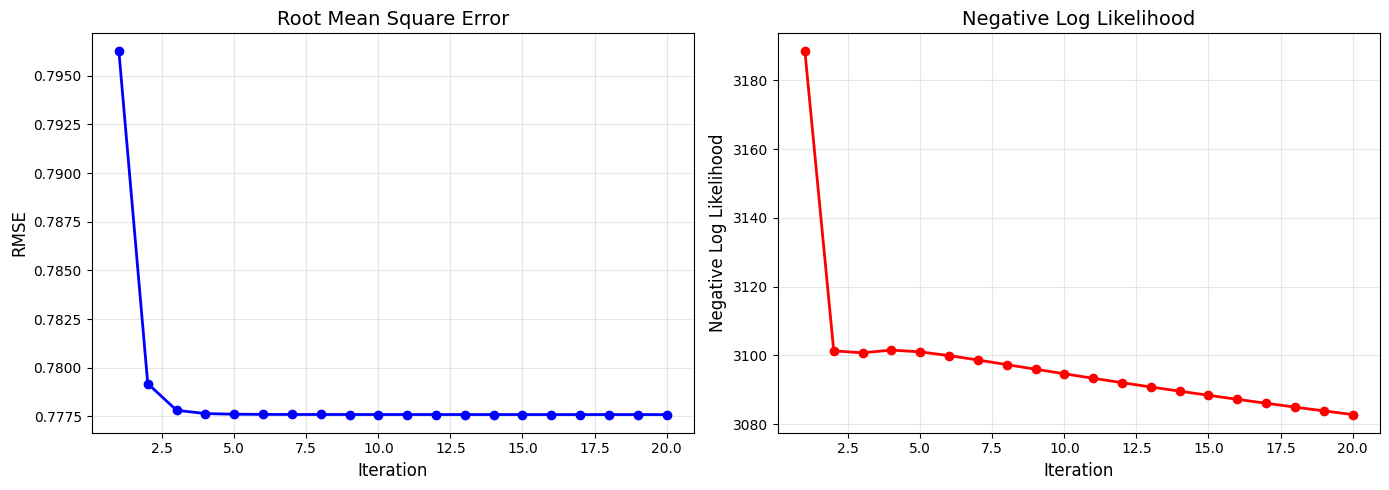

In [22]:
train_als.plot_metrics(output='pics/als-bias-only-train.pdf')

In [31]:
test_als = BiasOnlyALS(lambda_reg=0.05)

In [32]:
test_als.fit(csr_matrix=test_csr, csc_matrix=test_csc,n_iterations=10)

Iteration 1/10 - RMSE: 0.7203, NLL: 5305.1657
Iteration 2/10 - RMSE: 0.6977, NLL: 4991.8967
Iteration 3/10 - RMSE: 0.6944, NLL: 4949.5861
Iteration 4/10 - RMSE: 0.6937, NLL: 4941.9183
Iteration 5/10 - RMSE: 0.6935, NLL: 4940.1738
Iteration 6/10 - RMSE: 0.6934, NLL: 4939.6488
Iteration 7/10 - RMSE: 0.6934, NLL: 4939.4285
Iteration 8/10 - RMSE: 0.6934, NLL: 4939.3018
Iteration 9/10 - RMSE: 0.6934, NLL: 4939.2096
Iteration 10/10 - RMSE: 0.6934, NLL: 4939.1324


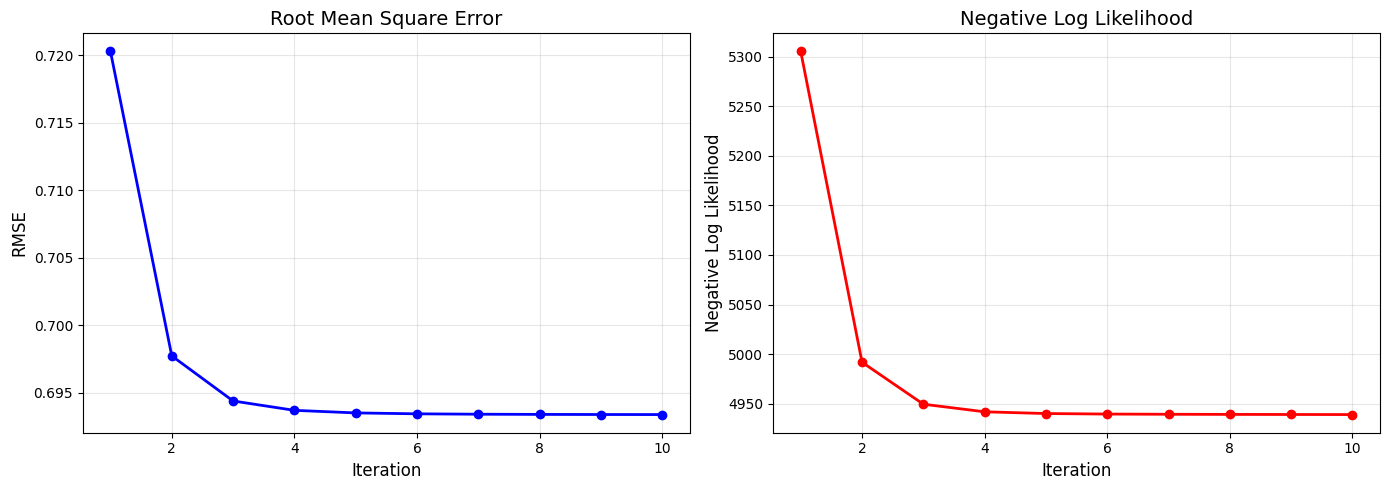

In [33]:
test_als.plot_metrics(output='pics/als-bias-only-test.pdf')